<a href="https://colab.research.google.com/github/honggilgim/python_test_with_colab/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%8B%9C%EB%8F%84_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('/content/train2.csv')
train.drop('id', inplace = True, axis=1)
test = pd.read_csv('/content/test2.csv')
test.drop('id', inplace = True, axis=1)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


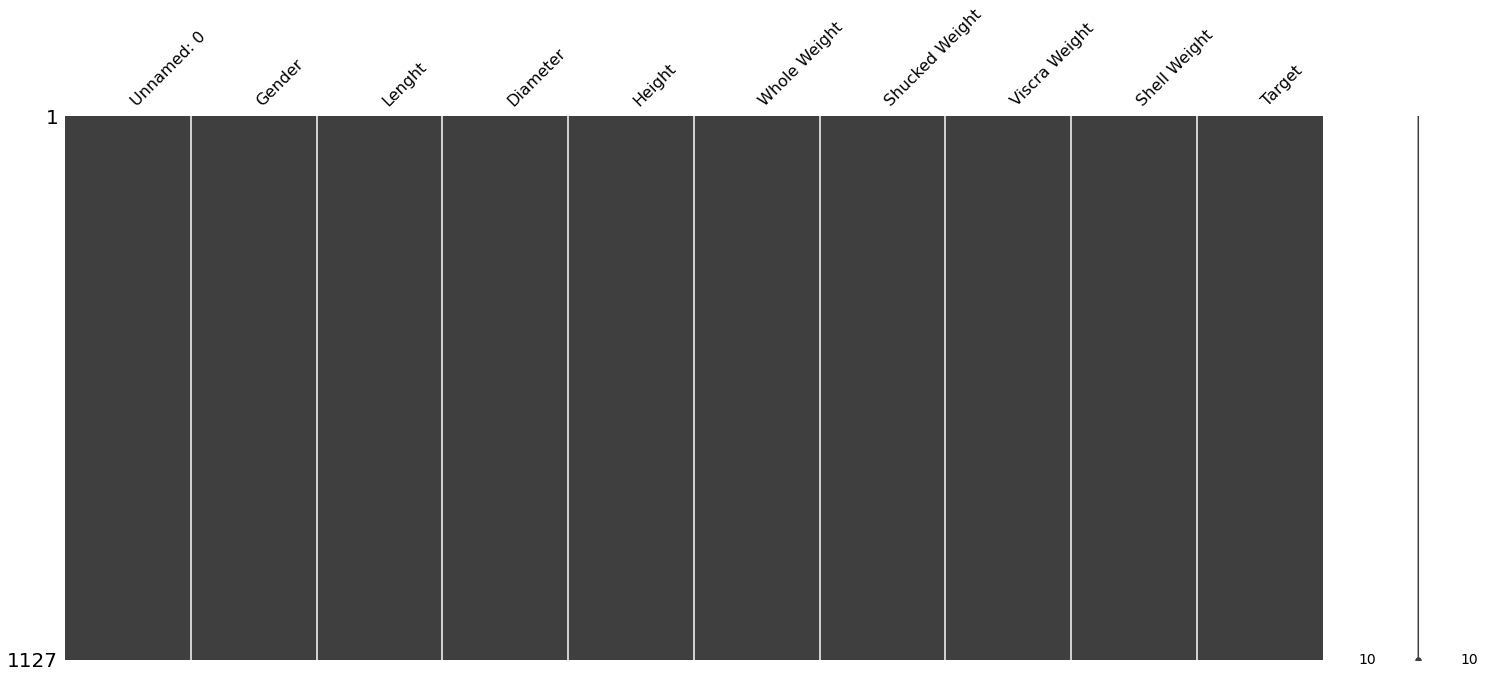

In [4]:
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline

plt.rc('font', family = 'NanumGothic')
msno.matrix(train)

In [5]:
train["Shell Water"] = round(train["Whole Weight"] - (train["Shucked Weight"] + train["Shell Weight"]),3)
test["Shell Water"] = round(test["Whole Weight"] - (test["Shucked Weight"] + test["Shell Weight"]),3)

In [6]:
train["ratio"] = round(train["Shucked Weight"] / train["Whole Weight"],3)
test["ratio"] = round(test["Shucked Weight"] / test["Whole Weight"] ,3)

In [7]:
train["density"] = round(train["Shucked Weight"] / (train["Lenght"]* train["Diameter"] * train["Height"]),3)
test["density"] = round(test["Shucked Weight"] / (train["Lenght"]* train["Diameter"] * train["Height"]),3)

In [8]:
train = pd.get_dummies(train)
train.head()

,Unnamed: 0,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Shell Water,ratio,density,Gender_F,Gender_I,Gender_M
0,1154,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14,0.246,0.425,8.102,0,0,1
1,830,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9,0.235,0.541,15.842,0,0,1
2,1162,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9,0.258,0.460,9.569,1,0,0
3,599,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6,0.032,0.467,19.355,0,1,0
4,1058,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9,0.040,0.351,8.698,0,0,1


In [9]:
test = pd.get_dummies(test)
test.head()

,Unnamed: 0,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Shell Water,ratio,density,Gender_F,Gender_I,Gender_M
0,1213,0.435,0.350,0.125,0.4590,0.1970,0.1145,0.145,9,0.117,0.429,4.000,1,0,0
1,537,0.525,0.395,0.165,0.7820,0.2850,0.1405,0.285,19,0.212,0.364,8.870,0,0,1
2,1216,0.465,0.360,0.080,0.4880,0.1910,0.1250,0.155,11,0.142,0.391,3.812,0,0,1
3,692,0.380,0.300,0.090,0.2770,0.1655,0.0625,0.082,6,0.030,0.597,47.455,0,1,0
4,575,0.510,0.390,0.125,0.6565,0.2620,0.1835,0.175,10,0.219,0.399,50.084,0,0,1


In [10]:
X = train.drop(columns = ['Target'], axis = 1)
y = train['Target']

In [11]:
X.shape

(1127, 14)

In [12]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split                                                     

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
# 피처 스케일링
scaler = preprocessing.MinMaxScaler()

train_X_norm = scaler.fit_transform(train_X)
valid_X_norm = scaler.fit_transform(valid_X)

In [14]:
def NMAE(true, pred):
    score = np.mean(np.abs(true - pred) / true)
    return score

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm
import os
import warnings

In [17]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 28.8 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 88 kB 7.9 MB/s 
     |████████████████████████████████| 1.3 MB 51.4 MB/s 
     |████████████████████████████████| 6.8 MB 59.9 MB/s 
     |████████████████████████████████| 262 kB 44.1 MB/s 
     |████████████████████████████████| 120 kB 56.6 MB/s 
     |████████████████████████████████| 167 kB 42.6 MB/s 
     |████████████████████████████████| 2.0 MB 50.9 MB/s 
     |████████████████████████████████| 1.7 MB 70.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 17.8 MB 61.9 MB/s 
     |████████████████████████████████| 1.3 MB 53.3 MB/s 
     |████████████████████████████████|

In [19]:
!pip install pycaret.regression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pycaret.regression (from versions: none)
ERROR: No matching distribution found for pycaret.regression
